In [3]:
!pip install importnb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 1.9 MB/s eta 0:00:00


In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from  sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import sys
sys.path.append("/content/drive/MyDrive/Colab Notebooks/portfolio/Linear Regression")
from importnb import Notebook
with Notebook():
    from Multi_Linear_Regression import MultiLinearRegression

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Enter your file path : /content/drive/MyDrive/Colab Notebooks/portfolio/Linear Regression/polysalary.csv
Enter poly future degree : 8
They are Loss function results :  [817773733.7899724, 567969087.8586165, 546188687.3735801, 506797763.457052, 600635111.106872, 535711211.12628573, 527166739.5491978, 519368747.2683288]
They are Degree of Polynomial features  [1, 2, 3, 4, 5, 6, 7, 8]


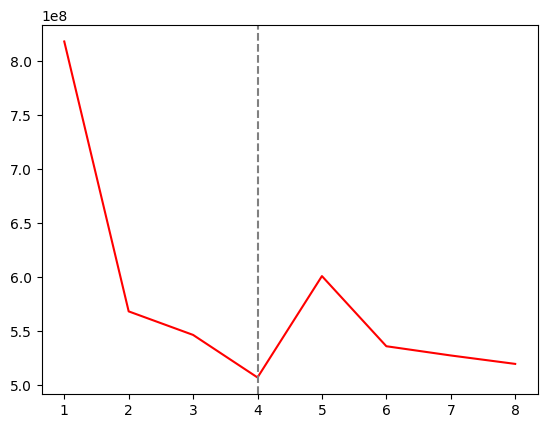

In [17]:
class mypolynomial_Regression(MultiLinearRegression):

  def __init__(self,X,y):
    self.deglist = []
    self.errlist = []
    self.X = X
    self.y = y


  def polyfeatures(self):
    X_new = PolynomialFeatures(degree = self.i+1)
    X_new = X_new.fit_transform(X)
    y_new = y
    return X_new , y
  def hist_mse_degree(self):
    self.Dnumber = int(input("Enter poly future degree : "))
    for self.i in range(self.Dnumber):
      X_new,y = mypolynomial_Regression.polyfeatures(self)
      Poly = MultiLinearRegression(X_new,y)
      Poly.splitdata()
      Poly.fitfordata()
      self.errlist.append(Poly.errorange())
      self.deglist.append(self.i+1)
    return self.errlist,self.deglist

  def elbow(self):
    plt.plot(self.deglist,self.errlist,color = "red")
    bestDegree = self.errlist.index(min(self.errlist))
    plt.axvline(x=bestDegree+1, color='gray', linestyle='--')

def DataFrame():
  file_path = str(input("Enter your file path : "))
  df = pd.read_csv(file_path)
  X = df[['Gender','Age','Years of Experience',"Education Level"]]
  y = df.iloc[:,-1]
  return X,y
X,y = DataFrame()
polynomialforfit = mypolynomial_Regression(X,y)
# polynomialforfit.splitdata()
MSE , Deg = polynomialforfit.hist_mse_degree()
print("They are Loss function results : " ,MSE)
print("They are Degree of Polynomial features " ,Deg)
polynomialforfit.elbow()


In [15]:
# X = df[['Gender','Age','Years of Experience']] and 6 degree is best

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/portfolio/Linear Regression/Salary_Data.csv")
df.shape


(6699, 6)

In [ ]:
print(df.isnull().sum())

Age                    0
Gender                 0
Education Level        1
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64


In [ ]:
df["Gender"].unique()
df["Gender"] = df["Gender"].map({"Male" : 1 ,"Female" :2 })

In [ ]:
mapping = {"Bachelor's" : 2, "Master's" : 3, 'PhD' : 4, "Bachelor's Degree" : 2,
       "Master's Degree" : 3, 'High School' : 1, 'phD' :4}
df["Education Level"] = df["Education Level"].map(mapping)

In [ ]:
print(df["Gender"].unique())
print(df["Education Level"].unique())

[ 1.  2. nan]
[ 2.  3.  4. nan  1.]


In [ ]:
print(df.shape)
df = df.dropna()
df.Gender.unique()
print(df.isnull().sum())
print(df.shape)
df.to_csv("polysalary.csv")

(6684, 6)
Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64
(6684, 6)


In [ ]:
X = np.array(df[["Age","Gender","Education Level","Years of Experience"]])
y = np.array(df["Salary"])
y = y.reshape(-1,1)
print(X.shape)
print(y.shape)

(6684, 4)
(6684, 1)


In [ ]:
poly_Features = PolynomialFeatures(degree=2)
X_poly = poly_Features.fit_transform(X)

In [ ]:
print(X_poly.shape)

(6684, 15)


In [ ]:
X_poly

array([[  1.,  32.,   1., ...,   4.,  10.,  25.],
       [  1.,  28.,   2., ...,   9.,   9.,   9.],
       [  1.,  45.,   1., ...,  16.,  60., 225.],
       ...,
       [  1.,  30.,   2., ...,   4.,   8.,  16.],
       [  1.,  46.,   1., ...,   9.,  42., 196.],
       [  1.,  26.,   2., ...,   1.,   1.,   1.]])

In [ ]:
def cost_function(X,y,w):
  # w = 15 x 1
  # X = 6684 x 15
  # y = 6684 x 1
  m = len(y)
  total_cost = 1/(2*m)*(np.sum(((X @ w) - y))**2)
  return total_cost

def gradient(X,y,alpha,iter_num):
  J_hist = []
  w = np.zeros((15,1))
  m = len(y)

  for i in range(iter_num):
    predict = X @ w
    error = predict - y
    gradient_descent = (1/m)*( X.T @ error )
    w = w - alpha * gradient_descent
    J_hist.append(cost_function(X,y,w))

  return J_hist,w

In [ ]:
J_hist,weight = gradient(X_poly,y,0.000000516,1000)

In [ ]:
weight

array([[  2.64200219],
       [ 53.52493377],
       [  3.40219741],
       [  8.85474201],
       [ 19.37883124],
       [ 76.35732385],
       [ 68.47292806],
       [165.36118445],
       [ 24.17785851],
       [  4.92258786],
       [ 12.90458607],
       [ 27.80257486],
       [ 27.14368422],
       [ 40.83058595],
       [-96.57591539]])

In [ ]:
J_hist

[np.float64(267154606178.21042),
 np.float64(260659178239.85815),
 np.float64(256957406834.4392),
 np.float64(253339442364.99036),
 np.float64(249802081895.6919),
 np.float64(246343324353.21426),
 np.float64(242961223110.0493),
 np.float64(239653883961.57086),
 np.float64(236419463634.59967),
 np.float64(233256168339.97968),
 np.float64(230162252367.6365),
 np.float64(227136016722.85614),
 np.float64(224175807802.55722),
 np.float64(221280016110.35535),
 np.float64(218447075009.25784),
 np.float64(215675459510.87823),
 np.float64(212963685100.07346),
 np.float64(210310306593.94376),
 np.float64(207713917034.1784),
 np.float64(205173146611.7512),
 np.float64(202686661622.99936),
 np.float64(200253163456.14526),
 np.float64(197871387607.37607),
 np.float64(195540102725.57465),
 np.float64(193258109684.8611),
 np.float64(191024240684.13312),
 np.float64(188837358372.76312),
 np.float64(186696355001.7208),
 np.float64(184600151599.32962),
 np.float64(182547697170.94586),
 np.float64(180537

999


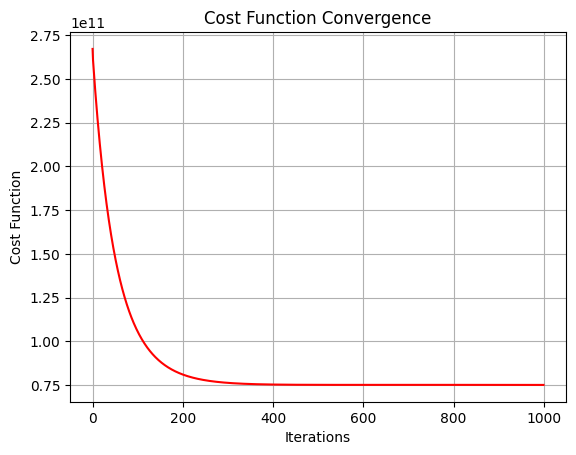

In [ ]:

iterationum =[]
for i in range(1000):
  iterationum.append(i)
print(iterationum[-1])
import matplotlib.pyplot as plt

plt.plot(iterationum,J_hist,color = "red")
plt.xlabel('Iterations')
plt.ylabel('Cost Function')
plt.title('Cost Function Convergence')
plt.grid(True)
plt.show()

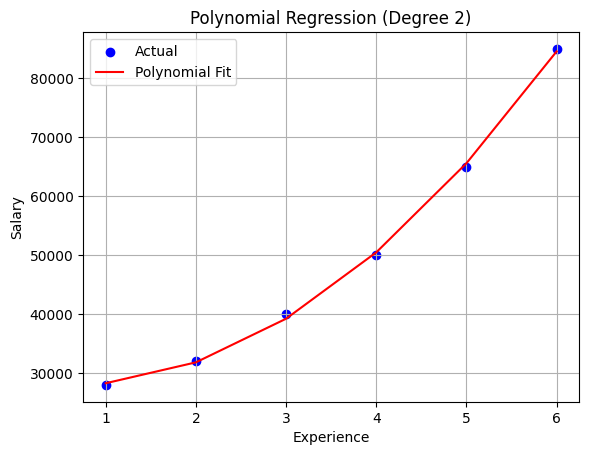

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Example dataset
data = {
    'Experience': [1, 2, 3, 4, 5, 6],
    'Salary': [28000, 32000, 40000, 50000, 65000, 85000]
}

df = pd.DataFrame(data)

# Features and target
X = df[['Experience']]
y = df['Salary']

# Polynomial transformation (degree 2 for quadratic)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Fit model
model = LinearRegression()
model.fit(X_poly, y)

# Predictions
df['Predicted_Salary'] = model.predict(X_poly)

# Plot
plt.scatter(df['Experience'], df['Salary'], color='blue', label='Actual')
plt.plot(df['Experience'], df['Predicted_Salary'], color='red', label='Polynomial Fit')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.legend()
plt.title('Polynomial Regression (Degree 2)')
plt.grid(True)
plt.show()


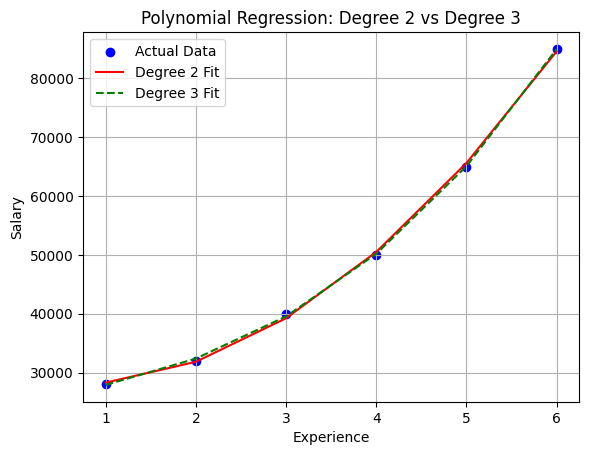

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Sample data
data = {
    'Experience': [1, 2, 3, 4, 5, 6],
    'Salary': [28000, 32000, 40000, 50000, 65000, 85000]
}
df = pd.DataFrame(data)
X = df[['Experience']]
y = df['Salary']

# First polynomial regression (degree 2)
poly2 = PolynomialFeatures(degree=2)
X_poly2 = poly2.fit_transform(X)
model2 = LinearRegression().fit(X_poly2, y)
pred2 = model2.predict(X_poly2)

# Second polynomial regression (degree 3)
poly3 = PolynomialFeatures(degree=3)
X_poly3 = poly3.fit_transform(X)
model3 = LinearRegression().fit(X_poly3, y)
pred3 = model3.predict(X_poly3)

# Plotting both in one figure
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, pred2, color='red', label='Degree 2 Fit')
plt.plot(X, pred3, color='green', linestyle='--', label='Degree 3 Fit')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.title('Polynomial Regression: Degree 2 vs Degree 3')
plt.legend()
plt.grid(True)
plt.show()
